Can we actually efficiently compute moments of the form E[cos(theta_t)^m sin(theta_t)^n]?

Cross Moment: 
v_t**2*sin(theta_t)*cos(theta_t) + v_t*x_t*sin(theta_t) + v_t*y_t*cos(theta_t) + x_t*y_t
xt * vt * sin(theta_t): 
Poly((cos(theta_t))**2*(sin(w_{theta_t}))*v_t**2 + (cos(theta_t))**2*(sin(w_{theta_t}))*v_t*w_{v_t} + (cos(theta_t))*(cos(w_{theta_t}))*(sin(theta_t))*v_t**2 + (cos(theta_t))*(cos(w_{theta_t}))*(sin(theta_t))*v_t*w_{v_t} + (cos(theta_t))*(sin(w_{theta_t}))*v_t*x_t + (cos(theta_t))*(sin(w_{theta_t}))*w_{v_t}*x_t + (cos(w_{theta_t}))*(sin(theta_t))*v_t*x_t + (cos(w_{theta_t}))*(sin(theta_t))*w_{v_t}*x_t, cos(theta_t), cos(w_{theta_t}), sin(theta_t), sin(w_{theta_t}), v_t, w_{v_t}, x_t, domain='ZZ')


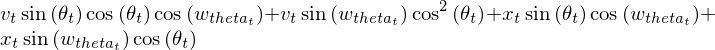

In [43]:
import sympy as sp
sp.init_printing()

# General idea:
# Express moments we want at time t + 1 in terms of moments at time t
# Store variables that should not be together in terms
# If two variables shouldn't be together, we need to decompose the expression further
xt = sp.Symbol("x_t")
yt = sp.Symbol("y_t")
vt = sp.Symbol("v_t")
wvt = sp.Symbol("w_{v_t}")
wthetat = sp.Symbol("w_{theta_t}")
thetat = sp.Symbol("theta_t")
cos_thetat = sp.cos(thetat)
sin_thetat = sp.sin(thetat)
sin_thetatplus1 = sp.sin(thetat + wthetat)
cos_thetatplus1 = sp.cos(thetat + wthetat)

t_variables = [xt, yt, vt, cos_thetat, sin_thetat]

xtplus1 = xt + vt * cos_thetat
ytplus1 = yt + vt * sin_thetat

# Express the update relation for E[x_t * y_t]
cross = sp.poly(xtplus1 * ytplus1, t_variables)
print("Cross Moment: ")
print(cross.as_expr())

# Express the update relation for E[x_t * v_t * sin(theta_t)]
xvsin = sp.poly(xtplus1 * (vt + wvt) * sp.expand_trig(sin_thetatplus1))
print("xt * vt * sin(theta_t): ")
print(xvsin)

xvcos = sp.poly(xtplus1 * (vt + wvt) * sp.expand_trig(cos_thetatplus1))

xsin = sp.poly(xtplus1 * sp.expand_trig(sin_thetatplus1))

xcos = sp.poly(xtplus1 * sp.expand_trig(cos_thetatplus1))

# Express the update relation for E[y_t * v_t * cos(theta_t)]
yvcos = sp.poly(ytplus1 * (vt + wvt) * sp.expand_trig(cos_thetatplus1))

# # 0: x0
# # 1: y0
# # 2: v0
# # 3: wv0
# # 4: cos(theta0)
# # 5: sin(theta0)
# dependent_pairs = [
#     (0, 1), (0, 2), (1,2), (0, 4), ()
# ]
cross.as_expr()
xvsin.as_expr()
xvcos.as_expr()

xcos.as_expr()
xsin.as_expr()



sin(theta_t)*cos(w_{theta_t}) + sin(w_{theta_t})*cos(theta_t)